In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [7]:
data=pd.read_csv('Merged_Data.csv',parse_dates=['Tarih'], index_col='Tarih',sep=',',decimal='.',date_format='%Y-%m-%d')
data=data.drop(columns=["Hacim","Fark%","GDP"],axis=1)
#data.dropna(inplace=True)
data.tail(10)

,AdjClose,Açılış,Yüksek,Düşük,M1,Inflation,InterestRate,USD_TRY,BIST100
Tarih,,,,,,,,,
2024-01-03,230.10,235.90,236.00,229.7,5.515378e+09,68.50,44.86,29.69,7412.04
2024-01-04,233.30,230.70,234.30,229.7,5.452040e+09,69.80,44.93,29.75,7547.84
2024-01-05,239.20,233.80,239.20,233.2,5.393797e+09,75.45,45.00,29.82,7628.73
2024-01-06,240.33,235.57,240.83,234.7,5.532444e+09,71.60,45.07,29.84,7692.12
2024-01-07,241.47,237.33,242.47,236.2,5.537031e+09,61.78,45.14,29.86,7755.50
2024-01-08,242.60,239.10,244.10,237.7,5.982992e+09,51.97,45.21,29.88,7818.89
2024-01-09,242.90,243.90,250.50,239.4,6.105518e+09,49.38,45.29,29.87,7736.26
2024-01-10,249.90,242.90,252.25,242.2,6.087428e+09,48.58,45.36,29.95,7874.16
2024-01-11,246.70,250.50,251.50,245.0,6.089273e+09,47.09,45.43,29.96,7895.96


In [8]:
data['LogAdjClose'] = np.log(data['AdjClose'])
data['DiffLogAdjClose'] = data['LogAdjClose'].diff()
data.dropna(inplace=True)

In [9]:
series = data['LogAdjClose']
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

In [10]:
from pmdarima.arima import auto_arima

model = auto_arima(train,
                   seasonal=False,
                   stepwise=True,
                   suppress_warnings=True,
                   trace=True)

c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\o

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13518.909, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13505.085, Time=0.14 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13509.970, Time=0.10 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13509.273, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13505.895, Time=0.09 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13513.178, Time=0.25 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13514.821, Time=0.54 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-13509.969, Time=1.51 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-13512.889, Time=1.59 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13512.727, Time=0.25 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-13511.884, Time=0.96 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-13512.285, Time=0.95 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-13510.942, Time=1.70 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-13520.091, Time=0.86 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-13514.178, Time=0.36 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-13515.805, Time=0.29 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-13510.972, Time=0.63 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-13513.755, Time=0.54 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13519.066, Time=0.55 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-13512.980, Time=1.24 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-13513.291, Time=0.84 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-13510.017, Time=0.19 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 15.998 seconds


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
print("Seçilen model:", model.summary())

Seçilen model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2637
Model:               SARIMAX(2, 1, 2)   Log Likelihood                6765.045
Date:                Thu, 27 Mar 2025   AIC                         -13520.091
Time:                        10:03:49   BIC                         -13490.706
Sample:                    01-03-2015   HQIC                        -13509.451
                         - 03-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0588      0.121     -0.486      0.627      -0.296       0.178
ar.L2          0.6756      0.124      5.453      0.000       0.433       0.918
ma.L1          0.0905      0.127     

In [13]:
# Test verisi kadar tahmin yap
forecast = model.predict(n_periods=len(test))

# RMSE (fiyat üzerinden)
true_prices = np.exp(test)
predicted_prices = np.exp(forecast)

rmse = np.sqrt(mean_squared_error(true_prices, predicted_prices))
print("Auto ARIMA RMSE (fiyat):", rmse)


Auto ARIMA RMSE (fiyat): 134.0521305878107


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


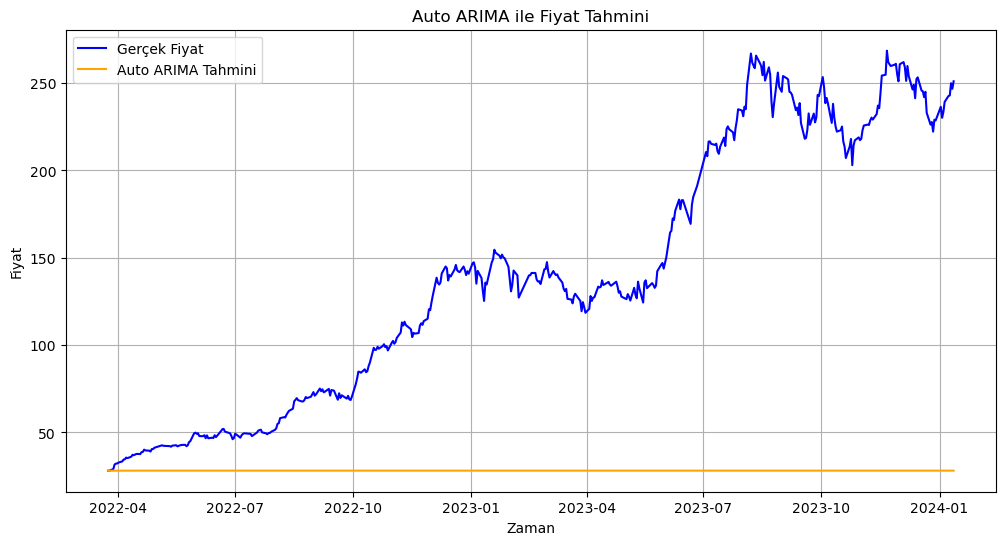

In [14]:
plt.figure(figsize=(12,6))
plt.plot(true_prices, label='Gerçek Fiyat', color='blue')
plt.plot(predicted_prices, label='Auto ARIMA Tahmini', color='orange')
plt.title('Auto ARIMA ile Fiyat Tahmini')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()
